<a href="https://www.kaggle.com/code/shanakk/salary-prd?scriptVersionId=141377854" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/kaggle/input/hiring/hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df=df.fillna(df.median())
df

/tmp/ipykernel_20/4249525367.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.median())


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [5]:
pip install word2number

  Preparing metadata (setup.py) ... - \ done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5583 sha256=e90ad8aaa2765e5861608eeadf4b15fdf2eecb3b36f1606ec6b84d3e40c30ec5
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [6]:
from word2number import w2n
df.experience=df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


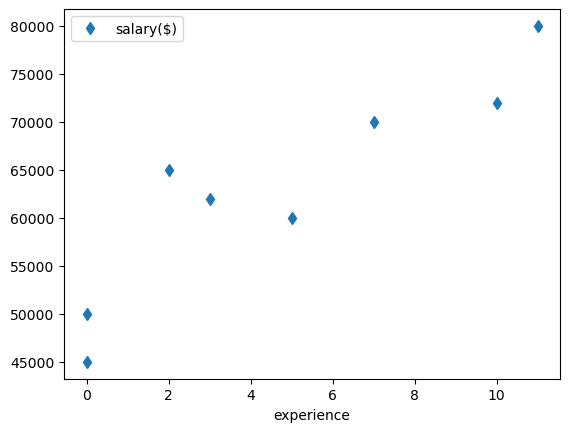

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
df.plot(x='experience',y='salary($)',style='d')
plt.show()

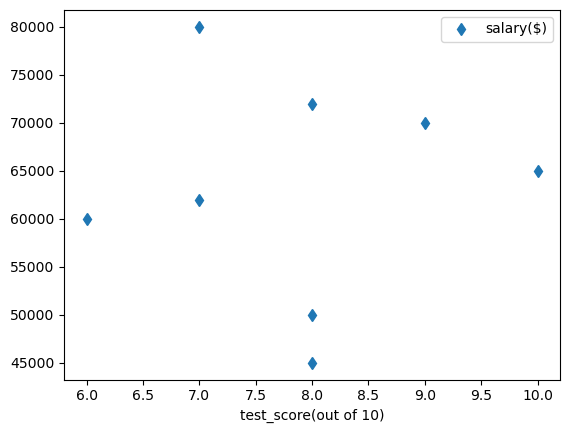

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
df.plot(x='test_score(out of 10)',y='salary($)',style='d')
plt.show()

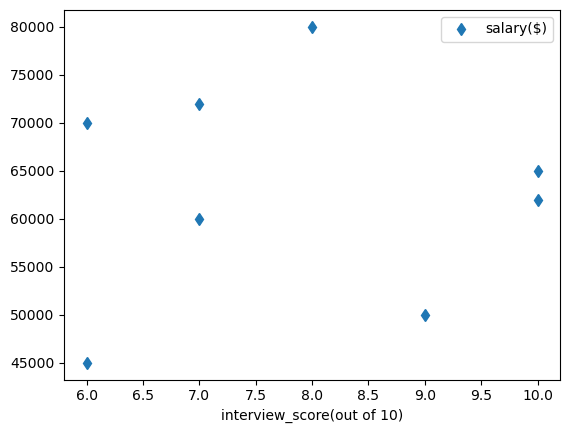

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
df.plot(x='interview_score(out of 10)',y='salary($)',style='d')
plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


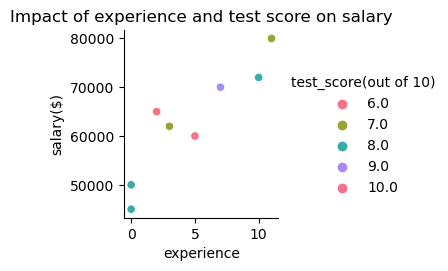

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
g=sns.pairplot(data=df[['experience','test_score(out of 10)','interview_score(out of 10)','salary($)']],x_vars=['experience'],y_vars='salary($)',aspect=1,hue='test_score(out of 10)',palette='husl')
plt.title('Impact of experience and test score on salary')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


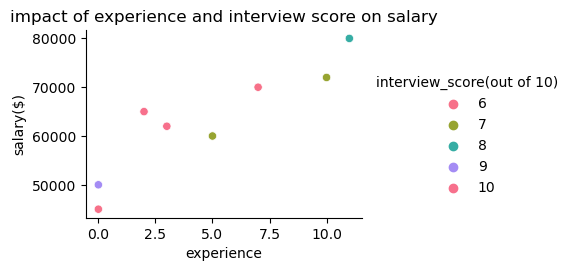

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
g=sns.pairplot(data=df[['experience','test_score(out of 10)','interview_score(out of 10)','salary($)']],x_vars=['experience'],y_vars='salary($)',aspect=1.5,hue='interview_score(out of 10)',palette='husl')

plt.title("impact of experience and interview score on salary")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


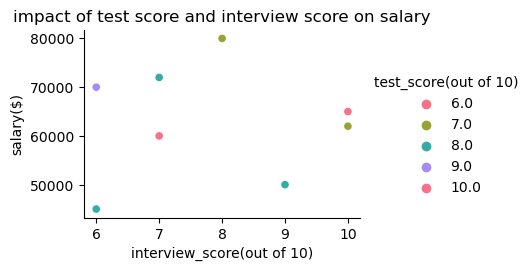

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
g=sns.pairplot(data=df[['experience','test_score(out of 10)','interview_score(out of 10)','salary($)']],x_vars=['interview_score(out of 10)'],y_vars='salary($)',aspect=1.5,hue='test_score(out of 10)',palette='husl')

plt.title("impact of test score and interview score on salary")
plt.show()

In [13]:
X=df[['experience','test_score(out of 10)','interview_score(out of 10)']]
Y=df['salary($)']

In [14]:
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [15]:
Y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [16]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(X,Y)
coeffs=pd.DataFrame(lr.coef_,index=X.columns,columns=["Parameters"])
coeffs

,Parameters
experience,2812.954876
test_score(out of 10),1845.705968
interview_score(out of 10),2205.240175


In [17]:
predictions=lr.predict(X)
scores=pd.DataFrame({'Actual':Y,'Prediction':predictions})
scores

,Actual,Prediction
0,50000,52350.072780
1,45000,45734.352256
2,60000,58312.954876
3,65000,63872.634643
4,70000,67270.742358
5,62000,61148.471616
6,72000,76069.141194
7,80000,79241.630277


In [18]:
from sklearn import metrics
import numpy as np

print('MAE ',metrics.mean_absolute_error(Y,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(Y,predictions)))
print('Average cost ',Y.mean())
print('R-Squared ',metrics.r2_score(Y,predictions))

MAE  1788.391557496362
RMSE  2106.1271258307547
Average cost  63000.0
R-Squared  0.9616780002577959


In [19]:
future_candidate=pd.DataFrame({
    'experience':[2,12],
    'test_score(out of 10)':[9,10],
    'interview_score(out of 10)':[6,10]
    
})
salary_predict=lr.predict(future_candidate)
future_candidate['salary_predict']=salary_predict
future_candidate

,experience,test_score(out of 10),interview_score(out of 10),salary_predict
0,2,9,6,53205.967977
1,12,10,10,92002.183406
